In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
class Perceptron():
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def netInput(self, x):
        return np.dot(x,  self.w_[1:]) + self.w_[0]

    def predict(self, x):
        return np.where(self.netInput(x) >= 0.0, 1, -1)

    def fit(self, x, y):
        self.w_ = np.zeros(1 + x.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(x, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
     

In [7]:
class AdalineGD(object):
    """Классификатор на основе ADALINE (ADAptive Llnear NEuron).
        Параметры:
            eta : float - Темп обучения (между 0.0 и 1.0)
            n_iter : int - Проходы по тренировочному набору данных.
            gd_type: int - Тип гадиентного спуска,
                где 1 - пакетный градиентный спуск,
                    0 - стохастический гадиентный спуск
        Атрибуты
            w_ : 1-мерный массив - весовые коэффициенты после подгонки
            cost_ : список - сумма квадратов функции стоимости в каждой эпохе.
            shuffle : bool - перемешивает тренировочные данные в каждой эпохе
            random_state : int - инициализирует генератор случайных чисел
    """


    def __init__(self, eta=0.01, n_iter=10, type_grad_descent='Batch', shuffle=True, random_state=None):
        """Инициализирует свойства нейрона."""

        self.eta = eta
        self.n_iter = n_iter
        self.type_grad_descent = type_grad_descent
        self.w_initialized = False # инициализации ещё не было
        self.shuffle = shuffle
        if random_state:
            seed(random_state) # начальн.сост. генератора случайных чисел


    def net_input(self, x):
        """ Рассчитать чистый вход (до активационной функции) """

        return np.dot(x, self.w_[1:]) + self.w_[0] # np.dot – матричное произв.


    def activation(self, x):
        """ Рассчитать линейную активацию """

        return self.net_input(x)


    def predict(self, x):
        """Вернуть метку класса (после активационной функции) """
        return np.where(self.activation(x) >= 0.0, 1, -1)


    def _initialize_weights(self, m):
        """Инициализировать веса нулями
            Параметр: m - число входов"""
        self.w_ = np.zeros(1 + m) # кол-во весов = число входов + смещение
        self.w_initialized = True # инициализация прошла


    def _shuffle(self, x, y):
        """Перемешать тренировочные данные"""
        r = np.random.permutation(len(y))
        return x[r], y[r]


    def _update_weights(self, xi, target):
        """Применить обучение ADALINE, что бы обновить веса"""
        output = self.net_input(xi) # рассчитать чистый вход (до актив.функц.)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2 # квадратичная ошибка на i-м примере
        return cost


    def fit(self, x, y):
        """Выполнить подгонку модели под тренировочные данные.
            Параметры:
                x : Массив тренировочных векторов [n_samples, n_features],
                где n_samples - число образцов
                    n_features - число признаков.
                у : целевые значения, [n_sampl es]
            Возвращает:
                self : object
        """
        if self.type_grad_descent=='Stochastic':

            self._initialize_weights(X.shape[1])
            self.cost_ = []

            for i in range(self.n_iter):
                if self.shuffle: # перемешивание трен. выборки
                    x, y = self._shuffle(x, y)
                cost = []
                for xi, target in zip(x, y): # обучение
                    cost.append(self._update_weights(xi, target))
                avg_cost = sum(cost) / len(y) # ср.кв.ошибка на текущей эпохе
                self.cost_.append(avg_cost)

            return self

        elif self.type_grad_descent=='Batch':

            self.w_ = np.zeros(1 + x.shape[1])
            self.cost_ = []

            for i in range(self.n_iter):
                output = self.net_input(x)
                errors = (y - output)
                self.w_[1:] += self.eta * x.T.dot(errors)
                self.w_[0] += self.eta * errors.sum()
                cost = (errors**2).sum() / 2.0
                self.cost_.append(cost)

            return self
        else:
            return None

In [8]:
iris_dataset = load_iris()
x = iris_dataset['data'][0:100,[0, 2]]
y = iris_dataset['target'][0:100]
y = np.where(y==0, -1, 1)
     

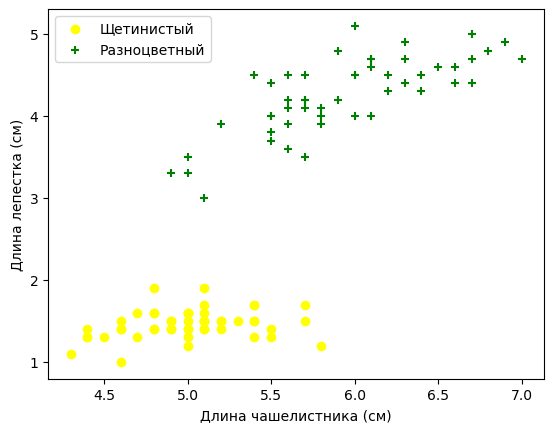

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x[:50, 0], x[:50, 1], color='yellow', marker='o', label='Щетинистый')
plt.scatter(x[50:100, 0], x[50:100, 1], color='green', marker='+', label='Разноцветный')
plt.xlabel('Длина чашелистника (см)')
plt.ylabel('Длина лепестка (см)')
plt.legend()
plt.show()
     

     

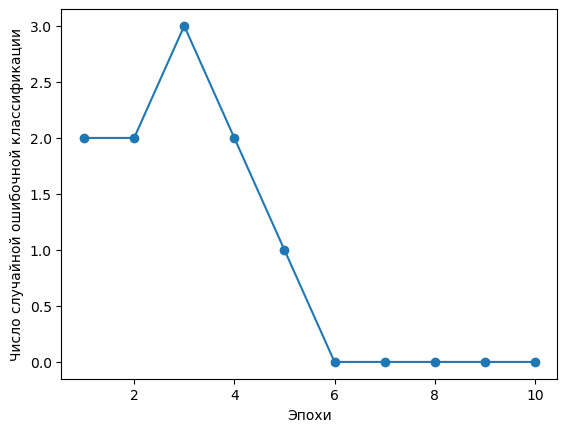

In [11]:
perceptron = Perceptron(eta=0.01, n_iter=10)
perceptron.fit(x, y)

plt.plot(range(1, len(perceptron.errors_)+1), perceptron.errors_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Число случайной ошибочной классификации')
plt.show()
     


C:\Users\dmitr\AppData\Local\Temp\ipykernel_11360\3124532256.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],
C:\Users\dmitr\AppData\Local\Temp\ipykernel_11360\3124532256.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


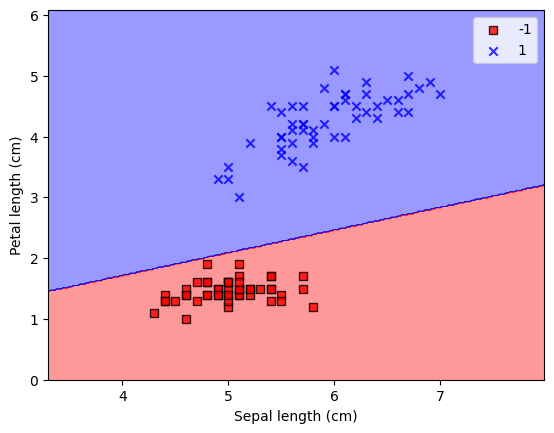

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plotDecisionRegions(x, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = [(1, 0, 0), (0, 0, 1), (0.5, 1, 0.5), (0.5, 0.5, 0.5), (0, 1, 1)]  # Красный, синий, светло-зеленый, серый, голубой
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = x[:,0].min() - 1, x[:,0].max() + 1
    x2_min, x2_max = x[:,1].min() - 1, x[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],
                    edgecolor='black', marker=markers[idx], label=cl)

plotDecisionRegions(x, y, perceptron)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend()
plt.show()


C:\Users\dmitr\AppData\Local\Temp\ipykernel_11360\3124532256.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],
C:\Users\dmitr\AppData\Local\Temp\ipykernel_11360\3124532256.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


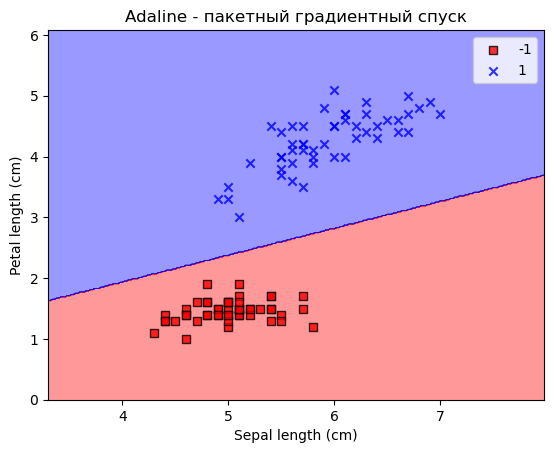

In [35]:
adaline_batch = AdalineGD(n_iter=50, eta=0.0001, type_grad_descent='Batch')
adaline_batch.fit(x, y)

plotDecisionRegions(x, y, adaline_batch)
plt.title('Adaline - пакетный градиентный спуск')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend()
plt.show()
     

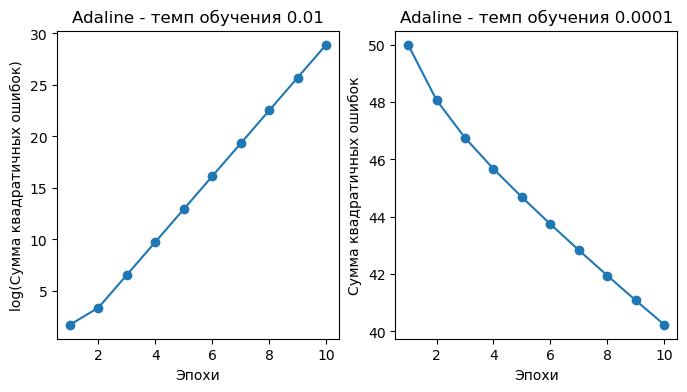

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01, type_grad_descent='Batch').fit(x, y) # eta=0.01
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Эпохи')
ax[0].set_ylabel('log(Сумма квадратичных ошибок)')
ax[0].set_title('Adaline - темп обучения 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001, type_grad_descent='Batch').fit(x, y) # eta=0.0001
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Эпохи')
ax[1].set_ylabel('Сумма квадратичных ошибок')
ax[1].set_title('Adaline - темп обучения 0.0001')

plt.show()

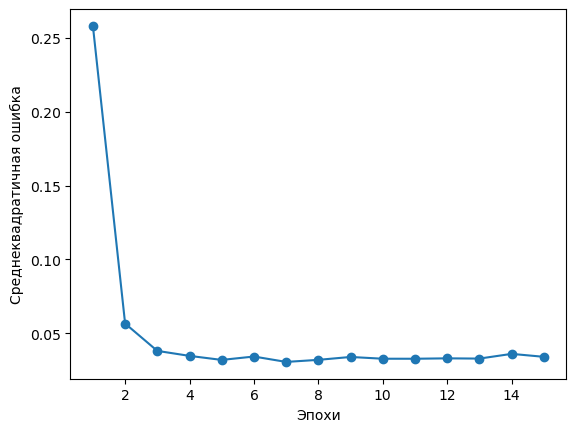

C:\Users\dmitr\AppData\Local\Temp\ipykernel_4100\3745339374.py:138: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],
C:\Users\dmitr\AppData\Local\Temp\ipykernel_4100\3745339374.py:138: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


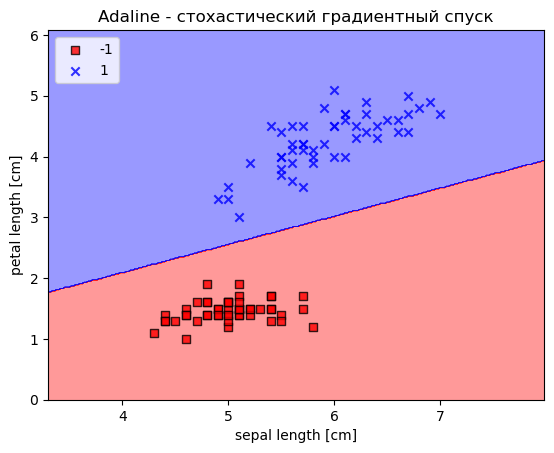

In [6]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

iris_dataset = load_iris()
x = iris_dataset['data'][0:100,[0, 2]]
y = iris_dataset['target'][0:100]
y = np.where(y==0, -1, 1)
class AdalineGD(object):
    """Классификатор на основе ADALINE (ADAptive Llnear NEuron).
        Параметры:
            eta : float - Темп обучения (между 0.0 и 1.0)
            n_iter : int - Проходы по тренировочному набору данных.
            gd_type: int - Тип гадиентного спуска,
                где 1 - пакетный градиентный спуск,
                    0 - стохастический гадиентный спуск
        Атрибуты
            w_ : 1-мерный массив - весовые коэффициенты после подгонки
            cost_ : список - сумма квадратов функции стоимости в каждой эпохе.
            shuffle : bool - перемешивает тренировочные данные в каждой эпохе
            random_state : int - инициализирует генератор случайных чисел
    """


    def __init__(self, eta=0.01, n_iter=10, type_grad_descent='Batch', shuffle=True, random_state=None):
        """Инициализирует свойства нейрона."""

        self.eta = eta
        self.n_iter = n_iter
        self.type_grad_descent = type_grad_descent
        self.w_initialized = False # инициализации ещё не было
        self.shuffle = shuffle
        if random_state:
            seed(random_state) # начальн.сост. генератора случайных чисел


    def net_input(self, x):
        """ Рассчитать чистый вход (до активационной функции) """

        return np.dot(x, self.w_[1:]) + self.w_[0] # np.dot – матричное произв.


    def activation(self, x):
        """ Рассчитать линейную активацию """

        return self.net_input(x)


    def predict(self, x):
        """Вернуть метку класса (после активационной функции) """
        return np.where(self.activation(x) >= 0.0, 1, -1)


    def _initialize_weights(self, m):
        """Инициализировать веса нулями
            Параметр: m - число входов"""
        self.w_ = np.zeros(1 + m) # кол-во весов = число входов + смещение
        self.w_initialized = True # инициализация прошла


    def _shuffle(self, x, y):
        """Перемешать тренировочные данные"""
        r = np.random.permutation(len(y))
        return x[r], y[r]


    def _update_weights(self, xi, target):
        """Применить обучение ADALINE, что бы обновить веса"""
        output = self.net_input(xi) # рассчитать чистый вход (до актив.функц.)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2 # квадратичная ошибка на i-м примере
        return cost


    def fit(self, x, y):
        """Выполнить подгонку модели под тренировочные данные.
            Параметры:
                x : Массив тренировочных векторов [n_samples, n_features],
                где n_samples - число образцов
                    n_features - число признаков.
                у : целевые значения, [n_sampl es]
            Возвращает:
                self : object
        """
        if self.type_grad_descent=='Stochastic':

            self._initialize_weights(x.shape[1])
            self.cost_ = []

            for i in range(self.n_iter):
                if self.shuffle: # перемешивание трен. выборки
                    x, y = self._shuffle(x, y)
                cost = []
                for xi, target in zip(x, y): # обучение
                    cost.append(self._update_weights(xi, target))
                avg_cost = sum(cost) / len(y) # ср.кв.ошибка на текущей эпохе
                self.cost_.append(avg_cost)

            return self

        elif self.type_grad_descent=='Batch':

            self.w_ = np.zeros(1 + x.shape[1])
            self.cost_ = []

            for i in range(self.n_iter):
                output = self.net_input(x)
                errors = (y - output)
                self.w_[1:] += self.eta * x.T.dot(errors)
                self.w_[0] += self.eta * errors.sum()
                cost = (errors**2).sum() / 2.0
                self.cost_.append(cost)

            return self
        else:
            return None
def plotDecisionRegions(x, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = [(1, 0, 0), (0, 0, 1), (0.5, 1, 0.5), (0.5, 0.5, 0.5), (0, 1, 1)]  # Красный, синий, светло-зеленый, серый, голубой
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = x[:,0].min() - 1, x[:,0].max() + 1
    x2_min, x2_max = x[:,1].min() - 1, x[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],
                    edgecolor='black', marker=markers[idx], label=cl)
ada = AdalineGD(n_iter=15, eta=0.01, type_grad_descent='Stochastic')
ada.fit(x, y)

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Среднеквадратичная ошибка')
plt.show()

plotDecisionRegions(x, y, classifier = ada) # Постр.граф.поверх.решения
plt.title('Adaline - стохастический градиентный спуск')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()